<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Top" data-toc-modified-id="Top-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Top</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Nones" data-toc-modified-id="Nones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Nones</a></span></li><li><span><a href="#Metrics" data-toc-modified-id="Metrics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Metrics</a></span><ul class="toc-item"><li><span><a href="#Resolution-Ratio" data-toc-modified-id="Resolution-Ratio-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Resolution Ratio</a></span></li><li><span><a href="#F1" data-toc-modified-id="F1-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>F1</a></span></li><li><span><a href="#Question-Difficulty" data-toc-modified-id="Question-Difficulty-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Question Difficulty</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#complete-results-tables" data-toc-modified-id="complete-results-tables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>complete results tables</a></span></li><li><span><a href="#Pareto-Efficiency" data-toc-modified-id="Pareto-Efficiency-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Pareto Efficiency</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Synthetic-Data" data-toc-modified-id="Synthetic-Data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Synthetic Data</a></span><ul class="toc-item"><li><span><a href="#F1-per-(framework,-random,-size)" data-toc-modified-id="F1-per-(framework,-random,-size)-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>F1 per (framework, random, size)</a></span></li><li><span><a href="#RR-per-(framework,-random,-size)" data-toc-modified-id="RR-per-(framework,-random,-size)-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>RR per (framework, random, size)</a></span></li></ul></li><li><span><a href="#Datasets" data-toc-modified-id="Datasets-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Datasets</a></span><ul class="toc-item"><li><span><a href="#F1-per-(framework,-random,-dataset)" data-toc-modified-id="F1-per-(framework,-random,-dataset)-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>F1 per (framework, random, dataset)</a></span></li><li><span><a href="#RR-per-(framework,-random,-dataset)" data-toc-modified-id="RR-per-(framework,-random,-dataset)-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>RR per (framework, random, dataset)</a></span></li></ul></li><li><span><a href="#Question-difficulty" data-toc-modified-id="Question-difficulty-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Question difficulty</a></span></li></ul></li><li><span><a href="#Bottom" data-toc-modified-id="Bottom-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bottom</a></span></li></ul></div>

# Top

# Import
import libraries and load datasets

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from igr import *

##### restaurants
df_restaurants = pd.read_pickle("temp/restaurants_repairs.pickle")
df_restaurants["dataset"] = "restaurants"

##### sepsis
df_sepsis = pd.read_pickle('temp/sepsis_repairs.pickle')
df_sepsis["dataset"] = "sepsis"

##### coauthor
df_coauthor = pd.read_pickle('temp/coauthor_repairs.pickle')
df_coauthor["dataset"] = "coauthor"

##### generated
df_gen = pd.read_pickle('temp/generated_repairs.pickle')
df_gen["dataset"] = "generated"
df_gen.rename(columns = {'answers':'Answers'}, inplace = True)

In [33]:
##### merge and reset index
df = pd.concat([df_gen, df_coauthor, df_sepsis, df_restaurants])
df["V"] = df["G"].apply(lambda g: len(g.nodes))
df = df.reset_index()
df.head()

index                                                  G             S  \
0      0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (a, b, c, d)   
1      1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (a, b, c, d)   
2      2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (a, b, c, d)   
3      3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (a, b, c, d)   
4      4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  (a, b, c, d)   

                                               G_opt  \
0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                   R  \
0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                  G'  \
0  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
2  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                             Answers  \
0                                [no, yes, yes, yes]   
1  [(16, b), (18, c), (16, c), (4, a), (2, a), (1...   
2  [(16, c), (16, b), (13, c), (13, d), (2, d), (...   
3  [delete, (13, b), (17, c), delete, delete, del...   
4                       [yes, delete, yes, yes, yes]   

                                        Q_difficulty framework        user  \
0                   [(4, 2), (4, 2), (4, 2), (4, 2)]      bool  userRandom   
1  [(2, 6), (2, 6), (2, 6), (2, 6), (2, 6), (2, 6...      gree  userRandom   
2  [(2, 9), (2, 9), (2, 9), (2, 9), (2, 9), (2, 9...      perm  userRandom   
3   [(2, 6), (2, 5), (2, 6), (2, 5), (2, 5), (2, 3)]      term  userRandom   
4           [(4, 2), (4, 2), (4, 2), (4, 2), (4, 2)]      bool  userGreedy   

          noise    dataset   V  
0  (0.27, 0.33)  generated  20  
1  (0.27, 0.33)  generated  20  
2  (0.27, 0.33)  generated  20  
3  (0.27, 0.33)  generated  20  
4  (0.27, 0.33)  generated  20

# Nones

Counting and managing failed experiments

In [3]:
df["G'"].isna().sum()

4502

In [39]:
nones = []
for i,g in df.groupby(["dataset", "noise", "user", "framework"]):
    
    na_sum = g["G'"].isna().sum()
    na_ratio = na_sum / len(g.index)
    mean_interactions = np.mean(g["Answers"].apply(len))
    if(i[0] == "generated"):
        interaction_budget_consumed = mean_interactions / g["V"].mean()
    else:
        interaction_budget_consumed = mean_interactions / (2 * g["V"].mean())
    
    nones.append((i, [na_ratio, interaction_budget_consumed]))
   
print("non terminating: \n")
for (group, values) in nones:
    if(values[0] > 0.5 and group[1] == "(0.27, 0.33)"):
        print(group, "failure ratio: ", round(values[0], 1), " | mean share of budget consumed: ", round(values[1], 3))
        
print("\n\nother failures that do not qualify as non terminating\n")
for (group, values) in nones:
    if(values[0] > 0 and values[0] <= 0.5 and group[1] == "(0.27, 0.33)"):
        print(group, "failure ratio: ", round(values[0], 1), " | mean share of budget consumed: ", round(values[1], 3))

non terminating: 

('coauthor', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  1.0  | mean share of budget consumed:  1.0
('generated', '(0.27, 0.33)', 'userRandom', 'bool') failure ratio:  0.9  | mean share of budget consumed:  0.994
('generated', '(0.27, 0.33)', 'userRandom', 'gree') failure ratio:  0.8  | mean share of budget consumed:  0.984
('generated', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  0.9  | mean share of budget consumed:  0.995
('restaurants', '(0.27, 0.33)', 'userRandom', 'bool') failure ratio:  0.8  | mean share of budget consumed:  0.964
('restaurants', '(0.27, 0.33)', 'userRandom', 'perm') failure ratio:  1.0  | mean share of budget consumed:  1.0


other failures that do not qualify as non terminating

('coauthor', '(0.27, 0.33)', 'userGreedy', 'bool') failure ratio:  0.3  | mean share of budget consumed:  0.473
('coauthor', '(0.27, 0.33)', 'userOracle', 'bool') failure ratio:  0.2  | mean share of budget consumed:  0.709
('generated', '(0.27, 0

We drop failed experiments, and further only report on experiment setups if failure ratio is below 0.5. Otherwise the experimental setup is considered *non-terminating*

In [5]:
df = df.dropna(subset="G'")

# Metrics

## Resolution Ratio

In [6]:
df["#questions"] = df["Answers"].apply(lambda x: len(x))
df["G_violations"] = df.apply(lambda x: len(violations(x.G, x.S)), axis=1)

df["resolution_ratio"] = df["G_violations"] / df["#questions"]

/tmp/ipykernel_694/2244987667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["#questions"] = df["Answers"].apply(lambda x: len(x))
/tmp/ipykernel_694/2244987667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["G_violations"] = df.apply(lambda x: len(violations(x.G, x.S)), axis=1)
/tmp/ipykernel_694/2244987667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

<AxesSubplot:>

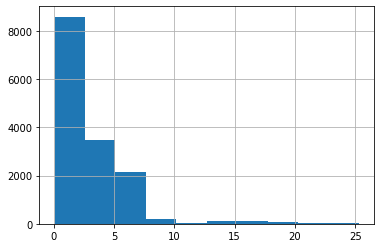

In [7]:
df["resolution_ratio"].hist()

In [8]:
df[["#questions", "G_violations", "resolution_ratio"]].describe()

#questions  G_violations  resolution_ratio
count  14758.000000  14758.000000      14758.000000
mean      76.454262    157.511384          3.198723
std      194.580428    243.102935          3.022866
min        1.000000      5.000000          0.076923
25%        6.000000     12.000000          1.375000
50%       17.000000     53.000000          2.167333
75%       74.000000    148.000000          3.857143
max     2750.000000   1475.000000         25.294118

## F1

In [9]:
def truth(G_opt, G):
    truth = set()
    
    for u in G.nodes:
        if(G.nodes[u]['label'] != G_opt.nodes[u]['label']):
            truth.add((u, G_opt.nodes[u]['label']))
    
    return truth

df["truth"] = df.apply(lambda x: truth(x["G_opt"], x["G"]), axis=1)

def modified(G, R):
    modified = set()
    
    for u in G.nodes:
        if(G.nodes[u]['label'] != R.nodes[u]['label']):
            modified.add((u, R.nodes[u]['label']))
    
    return modified

df["modified"] = df.apply(lambda x: modified(x["G"], x["G'"]), axis=1)

def tp(truth, modified):    
    return truth & modified

df["tp"] = df.apply(lambda x: tp(x["truth"], x["modified"]), axis=1)

def fp(modified, tp):
    return modified - tp
                         
df["fp"] = df.apply(lambda x: fp(x["modified"], x["tp"]), axis=1)


def fn(truth, fp, tp):
    return ((truth - fp) - tp)
df["fn"] = df.apply(lambda x: fn(x["truth"], x["fp"], x["tp"]), axis=1)
                         
#sanity check:
print(df.apply(lambda x: len(x["tp"] & x["fp"] & x["tp"]), axis=1).sum() == 0)

/tmp/ipykernel_694/387183299.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["truth"] = df.apply(lambda x: truth(x["G_opt"], x["G"]), axis=1)
/tmp/ipykernel_694/387183299.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["modified"] = df.apply(lambda x: modified(x["G"], x["G'"]), axis=1)
/tmp/ipykernel_694/387183299.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

True


/tmp/ipykernel_694/387183299.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fn"] = df.apply(lambda x: fn(x["truth"], x["fp"], x["tp"]), axis=1)


In [10]:
df["precision"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fp"])), axis=1)
df["recall"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fn"])), axis=1)

df["f1"] = df.apply(lambda x: 2*len(x["tp"]) / ( 2*len(x["tp"]) + len(x["fp"]) + len(x["fn"])), axis=1)

/tmp/ipykernel_694/887770346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["precision"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fp"])), axis=1)
/tmp/ipykernel_694/887770346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["recall"] = df.apply(lambda x: len(x["tp"]) / ( len(x["tp"]) + len(x["fn"])), axis=1)
/tmp/ipykernel_694/887770346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

<AxesSubplot:>

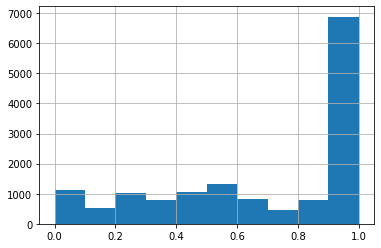

In [11]:
df["f1"].hist()

In [12]:
df.query("user == 'userGreedy'")["f1"].describe()

count    6184.000000
mean        0.571242
std         0.318008
min         0.000000
25%         0.333333
50%         0.545455
75%         0.903226
max         1.000000
Name: f1, dtype: float64

## Question Difficulty

In [13]:
def total_q_difficulty(qds, alpha=0.5, beta=0.5):
    sum = 0
    for (a,b) in qds:
        sum += a*alpha + b*beta
    return sum

df["qd"] = df["Q_difficulty"].apply(lambda x: total_q_difficulty(x))
df["mqd"] = df["qd"] / df["#questions"]

/tmp/ipykernel_694/1762981289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qd"] = df["Q_difficulty"].apply(lambda x: total_q_difficulty(x))
/tmp/ipykernel_694/1762981289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mqd"] = df["qd"] / df["#questions"]


<AxesSubplot:>

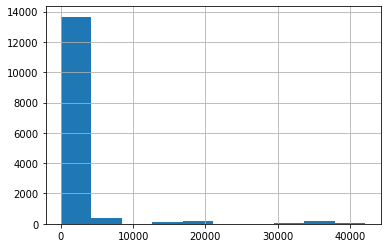

In [14]:
df["qd"].hist()

In [15]:
df[["qd", "mqd"]].describe()

qd           mqd
count  14758.000000  14758.000000
mean    1680.622476     31.825492
std     5833.836326    100.145696
min        2.000000      2.000000
25%       35.500000      3.000000
50%      117.000000      4.230769
75%      387.000000      7.400000
max    42126.000000    689.500000

In [ ]:
df.to_pickle('temp/metrics.pickle')

# Analysis

## complete results tables

In [16]:
print(df.groupby(["dataset", "noise", "user", "framework"])[["resolution_ratio", "f1", "qd"]].mean().to_string())

                                               resolution_ratio        f1            qd
dataset     noise        user       framework                                          
coauthor    (0.08, 0.12) userGreedy bool               0.830346  0.206481     36.000000
                                    gree               2.033333  0.445833     81.000000
                                    perm               2.008333  0.616667   1999.550000
                                    term               2.033333  0.504167     91.675000
                         userOracle bool               0.528532  0.565789     64.736842
                                    gree               2.008333  1.000000     71.550000
                                    perm               2.033333  1.000000   1965.075000
                                    term               2.008333  0.966667     77.200000
                         userRandom bool               0.418064  0.133333     56.250000
                                

In [17]:
df.groupby(["user", "framework"])[["resolution_ratio", "f1"]].describe()

resolution_ratio                                          \
                                count      mean       std       min       25%   
user       framework                                                            
userGreedy bool                1369.0  1.341065  1.357022  0.076923  0.617978   
           gree                1605.0  4.057097  3.217255  1.000000  2.000000   
           perm                1605.0  4.188289  3.325919  1.000000  2.000000   
           term                1605.0  4.045364  3.188041  1.000000  2.000000   
userOracle bool                1100.0  1.187069  1.318053  0.101695  0.467701   
           gree                1605.0  4.003991  3.222099  0.666667  2.000000   
           perm                1605.0  4.145868  3.328431  0.714286  2.000000   
           term                1605.0  4.023070  3.225662  1.000000  2.000000   
userRandom bool                 337.0  0.697971  0.552882  0.115385  0.333333   
           gree                 507.0  1.068262  0.794209  0.138889  0.601175   
           perm                 210.0  0.800061  0.596355  0.163175  0.239249   
           term                1605.0  2.402507  1.743287  1.000000  1.360000   

                                                         f1            \
                           50%       75%        max   count      mean   
user       framework                                                    
userGreedy bool       1.000000  1.500000  10.866667  1369.0  0.442962   
           gree       3.056818  5.350000  25.294118  1605.0  0.608544   
           perm       3.176471  5.666667  25.294118  1605.0  0.607309   
           term       3.055556  5.500000  25.294118  1605.0  0.607291   
userOracle bool       0.744172  1.357324   9.976190  1100.0  0.641013   
           gree       3.000000  5.500000  25.294118  1605.0  0.984331   
           perm       3.111111  5.833333  25.294118  1605.0  0.990256   
           term       3.000000  5.526316  25.294118  1605.0  0.969431   
userRandom bool       0.545455  0.888819   4.750000   337.0  0.201519   
           gree       0.817658  1.276190   5.500000   507.0  0.206121   
           perm       0.666667  1.111111   3.666667   210.0  0.154578   
           term       1.868966  3.000000  15.518519  1605.0  0.607291   

                                                                             
                           std       min       25%       50%       75%  max  
user       framework                                                         
userGreedy bool       0.292431  0.000000  0.222222  0.400000  0.636364  1.0  
           gree       0.315433  0.000000  0.375000  0.600000  0.938462  1.0  
           perm       0.315151  0.000000  0.344689  0.600000  0.940594  1.0  
           term       0.316284  0.000000  0.375000  0.600000  0.935484  1.0  
userOracle bool       0.293565  0.000000  0.444444  0.600000  0.975405  1.0  
           gree       0.044086  0.500000  1.000000  1.000000  1.000000  1.0  
           perm       0.033076  0.714286  1.000000  1.000000  1.000000  1.0  
           term       0.070991  0.333333  0.975207  1.000000  1.000000  1.0  
userRandom bool       0.225241  0.000000  0.000000  0.120301  0.296296  1.0  
           gree       0.212953  0.000000  0.000000  0.142857  0.307692  1.0  
           perm       0.173837  0.000000  0.000000  0.069623  0.250000  1.0  
           term       0.316284  0.000000  0.375000  0.600000  0.935484  1.0

In [18]:
df.groupby(["dataset", "noise"])[["qd", "mqd"]].mean()

qd         mqd
dataset     noise                                
coauthor    (0.08, 0.12)   465.532258  144.989917
            (0.18, 0.22)   911.638498  147.001821
            (0.27, 0.33)  1394.885167  151.756746
generated   (0.27, 0.33)  1626.953458   28.683430
restaurants (0.08, 0.12)   368.296209    4.401120
            (0.18, 0.22)   561.472222    4.506011
            (0.27, 0.33)   743.610256    4.532232
sepsis      (0.08, 0.12)  2007.822917    7.599394
            (0.18, 0.22)  4346.510417    7.615226
            (0.27, 0.33)  6417.085417    7.619318

## Pareto Efficiency

In [19]:
# credits to Peter : https://stackoverflow.com/questions/32791911/fast-calculation-of-pareto-front-in-python
# modified to maximize instead of minimize
def is_pareto_efficient_simple(costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]>c, axis=1)  # Keep any point with a higher cost
            is_efficient[i] = True  # And keep self
    return is_efficient

In [20]:
df_pareto = df.copy()
df_pareto["-mqd"] = -df_pareto["mqd"] # we need to maximize
# aggregate by (user, dataset, framework) triple
df_pareto = df_pareto.groupby(["user", "dataset", "framework"]).mean().reset_index()

In [21]:
pareto_results = pd.DataFrame()
for i,g in df_pareto.groupby(["user", "dataset"]):
    g["p_efficient"] = is_pareto_efficient_simple(g[["f1", "resolution_ratio", "-mqd"]].to_numpy())
    pareto_results= pd.concat([pareto_results, g[["user", "dataset", "framework", "p_efficient"]]])
    #print(g[["user", "dataset", "framework", "p_efficient"]])
    #print(i, g.groupby("framework")["p_efficient"].sum())
pareto_results[["user", "dataset", "framework", "p_efficient"]]

user      dataset framework  p_efficient
0   userGreedy     coauthor      bool         True
1   userGreedy     coauthor      gree         True
2   userGreedy     coauthor      perm         True
3   userGreedy     coauthor      term         True
4   userGreedy    generated      bool         True
5   userGreedy    generated      gree         True
6   userGreedy    generated      perm         True
7   userGreedy    generated      term         True
8   userGreedy  restaurants      bool        False
9   userGreedy  restaurants      gree         True
10  userGreedy  restaurants      perm         True
11  userGreedy  restaurants      term         True
12  userGreedy       sepsis      bool         True
13  userGreedy       sepsis      gree         True
14  userGreedy       sepsis      perm        False
15  userGreedy       sepsis      term         True
16  userOracle     coauthor      bool         True
17  userOracle     coauthor      gree         True
18  userOracle     coauthor      perm         True
19  userOracle     coauthor      term         True
20  userOracle    generated      bool         True
21  userOracle    generated      gree         True
22  userOracle    generated      perm         True
23  userOracle    generated      term         True
24  userOracle  restaurants      bool        False
25  userOracle  restaurants      gree         True
26  userOracle  restaurants      perm         True
27  userOracle  restaurants      term         True
28  userOracle       sepsis      bool         True
29  userOracle       sepsis      gree         True
30  userOracle       sepsis      perm         True
31  userOracle       sepsis      term         True
32  userRandom     coauthor      bool         True
33  userRandom     coauthor      gree        False
34  userRandom     coauthor      term         True
35  userRandom    generated      bool         True
36  userRandom    generated      gree        False
37  userRandom    generated      perm        False
38  userRandom    generated      term         True
39  userRandom  restaurants      bool        False
40  userRandom  restaurants      gree        False
41  userRandom  restaurants      term         True
42  userRandom       sepsis      bool         True
43  userRandom       sepsis      gree        False
44  userRandom       sepsis      perm        False
45  userRandom       sepsis      term         True

## Plots

In [22]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [23]:
user_map = {"userRandom" : "Random",
            "userGreedy" : "MaxFix",
            "userOracle" : "Oracle"}
framework_map = {"bool" : "F Bool",
                 "gree" : "F Greedy",
                 "perm" : "F Permissive",
                 "term" : "F Term"}
dataset_map = {"generated"  : "synthetic",
               "coauthor"   : "coauthor",
               "sepsis"     : "sepsis",
               "restaurants": "restaurants",
               "":""}

## Synthetic Data

In [24]:
df_11 = df.query("noise == '(0.27, 0.33)' & dataset == 'generated'").copy()

### F1 per (framework, random, size)

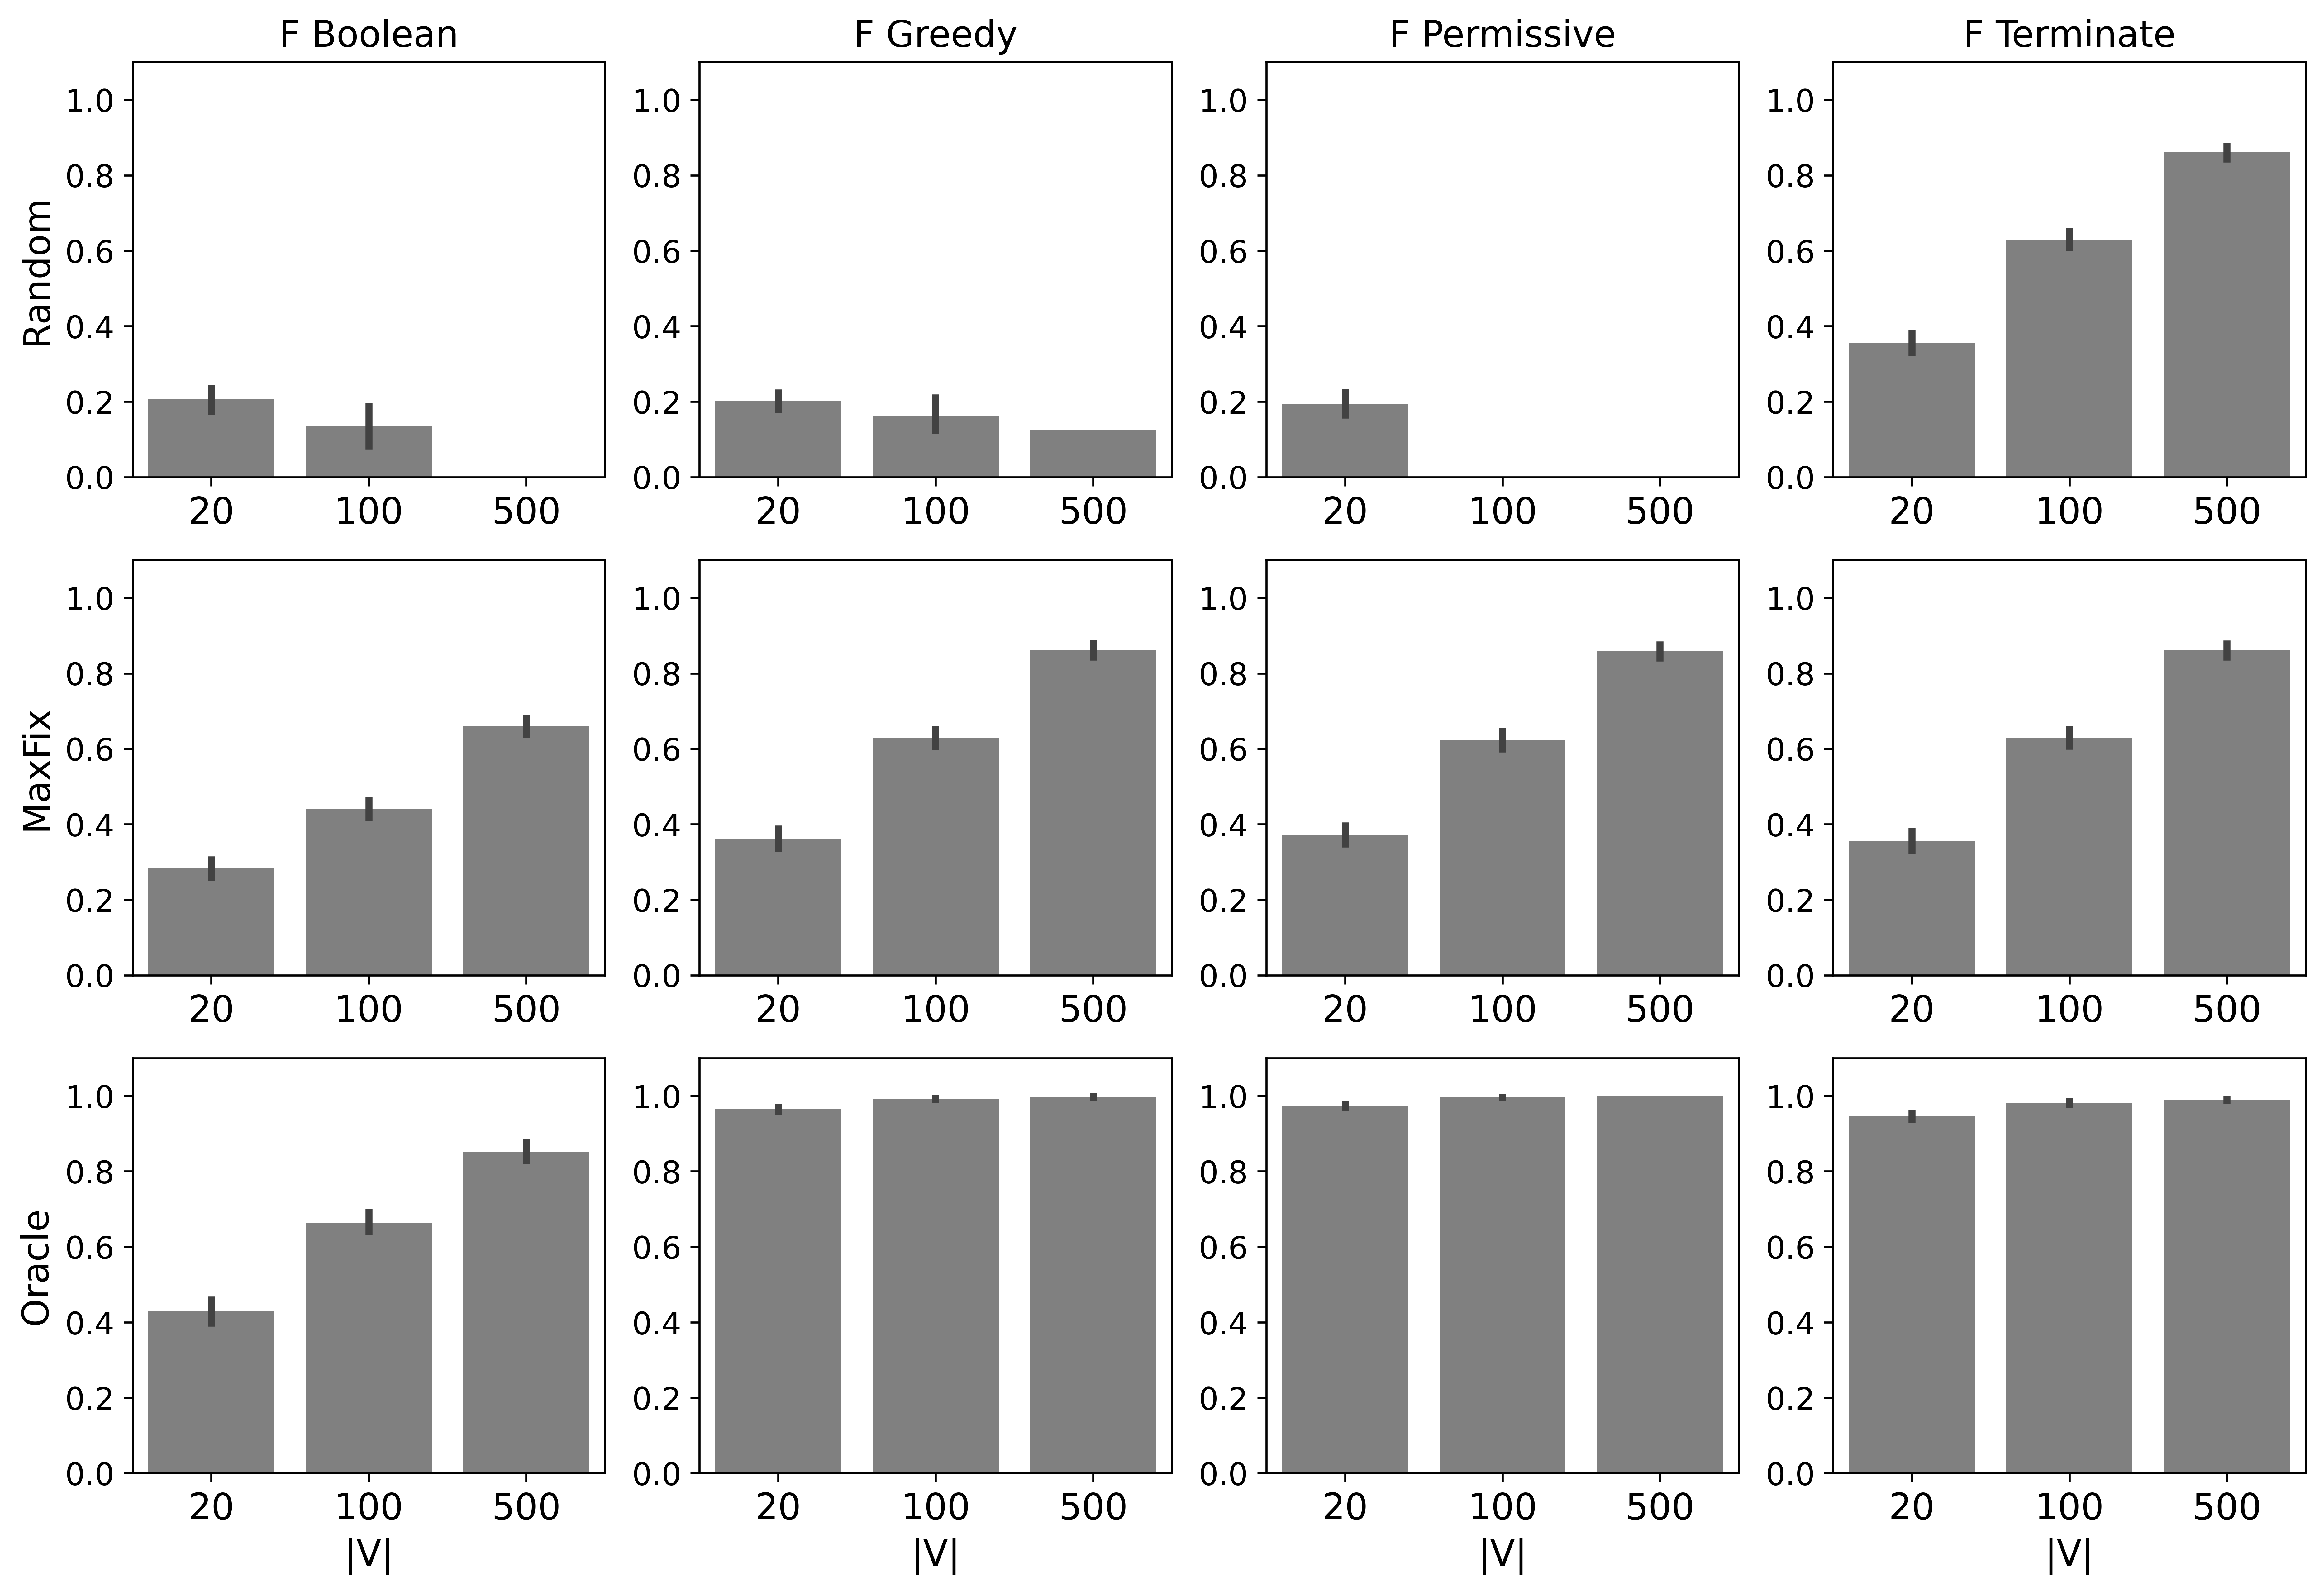

In [25]:
fig, axs = plt.subplots(3,4, figsize = (15, 10), sharex="row", dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(df["framework"].unique()):
    df_temp = df_11.query("user == '" + user + "' & framework == '" + framework + "'")

    sns.barplot(data=df_temp,
                x="V", y="f1",
                orient = "v",
                ax=axs[i,j],
                color="gray")
    axs[i,j].set_ylim([0, 1.1])
    axs[i,j].set(xlabel=None, ylabel=None)
    
for j,framework in enumerate(df["framework"].unique()):
    axs[0, j].set(title=framework_map[framework])
    axs[2, j].set(xlabel="|V|")
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

### RR per (framework, random, size)

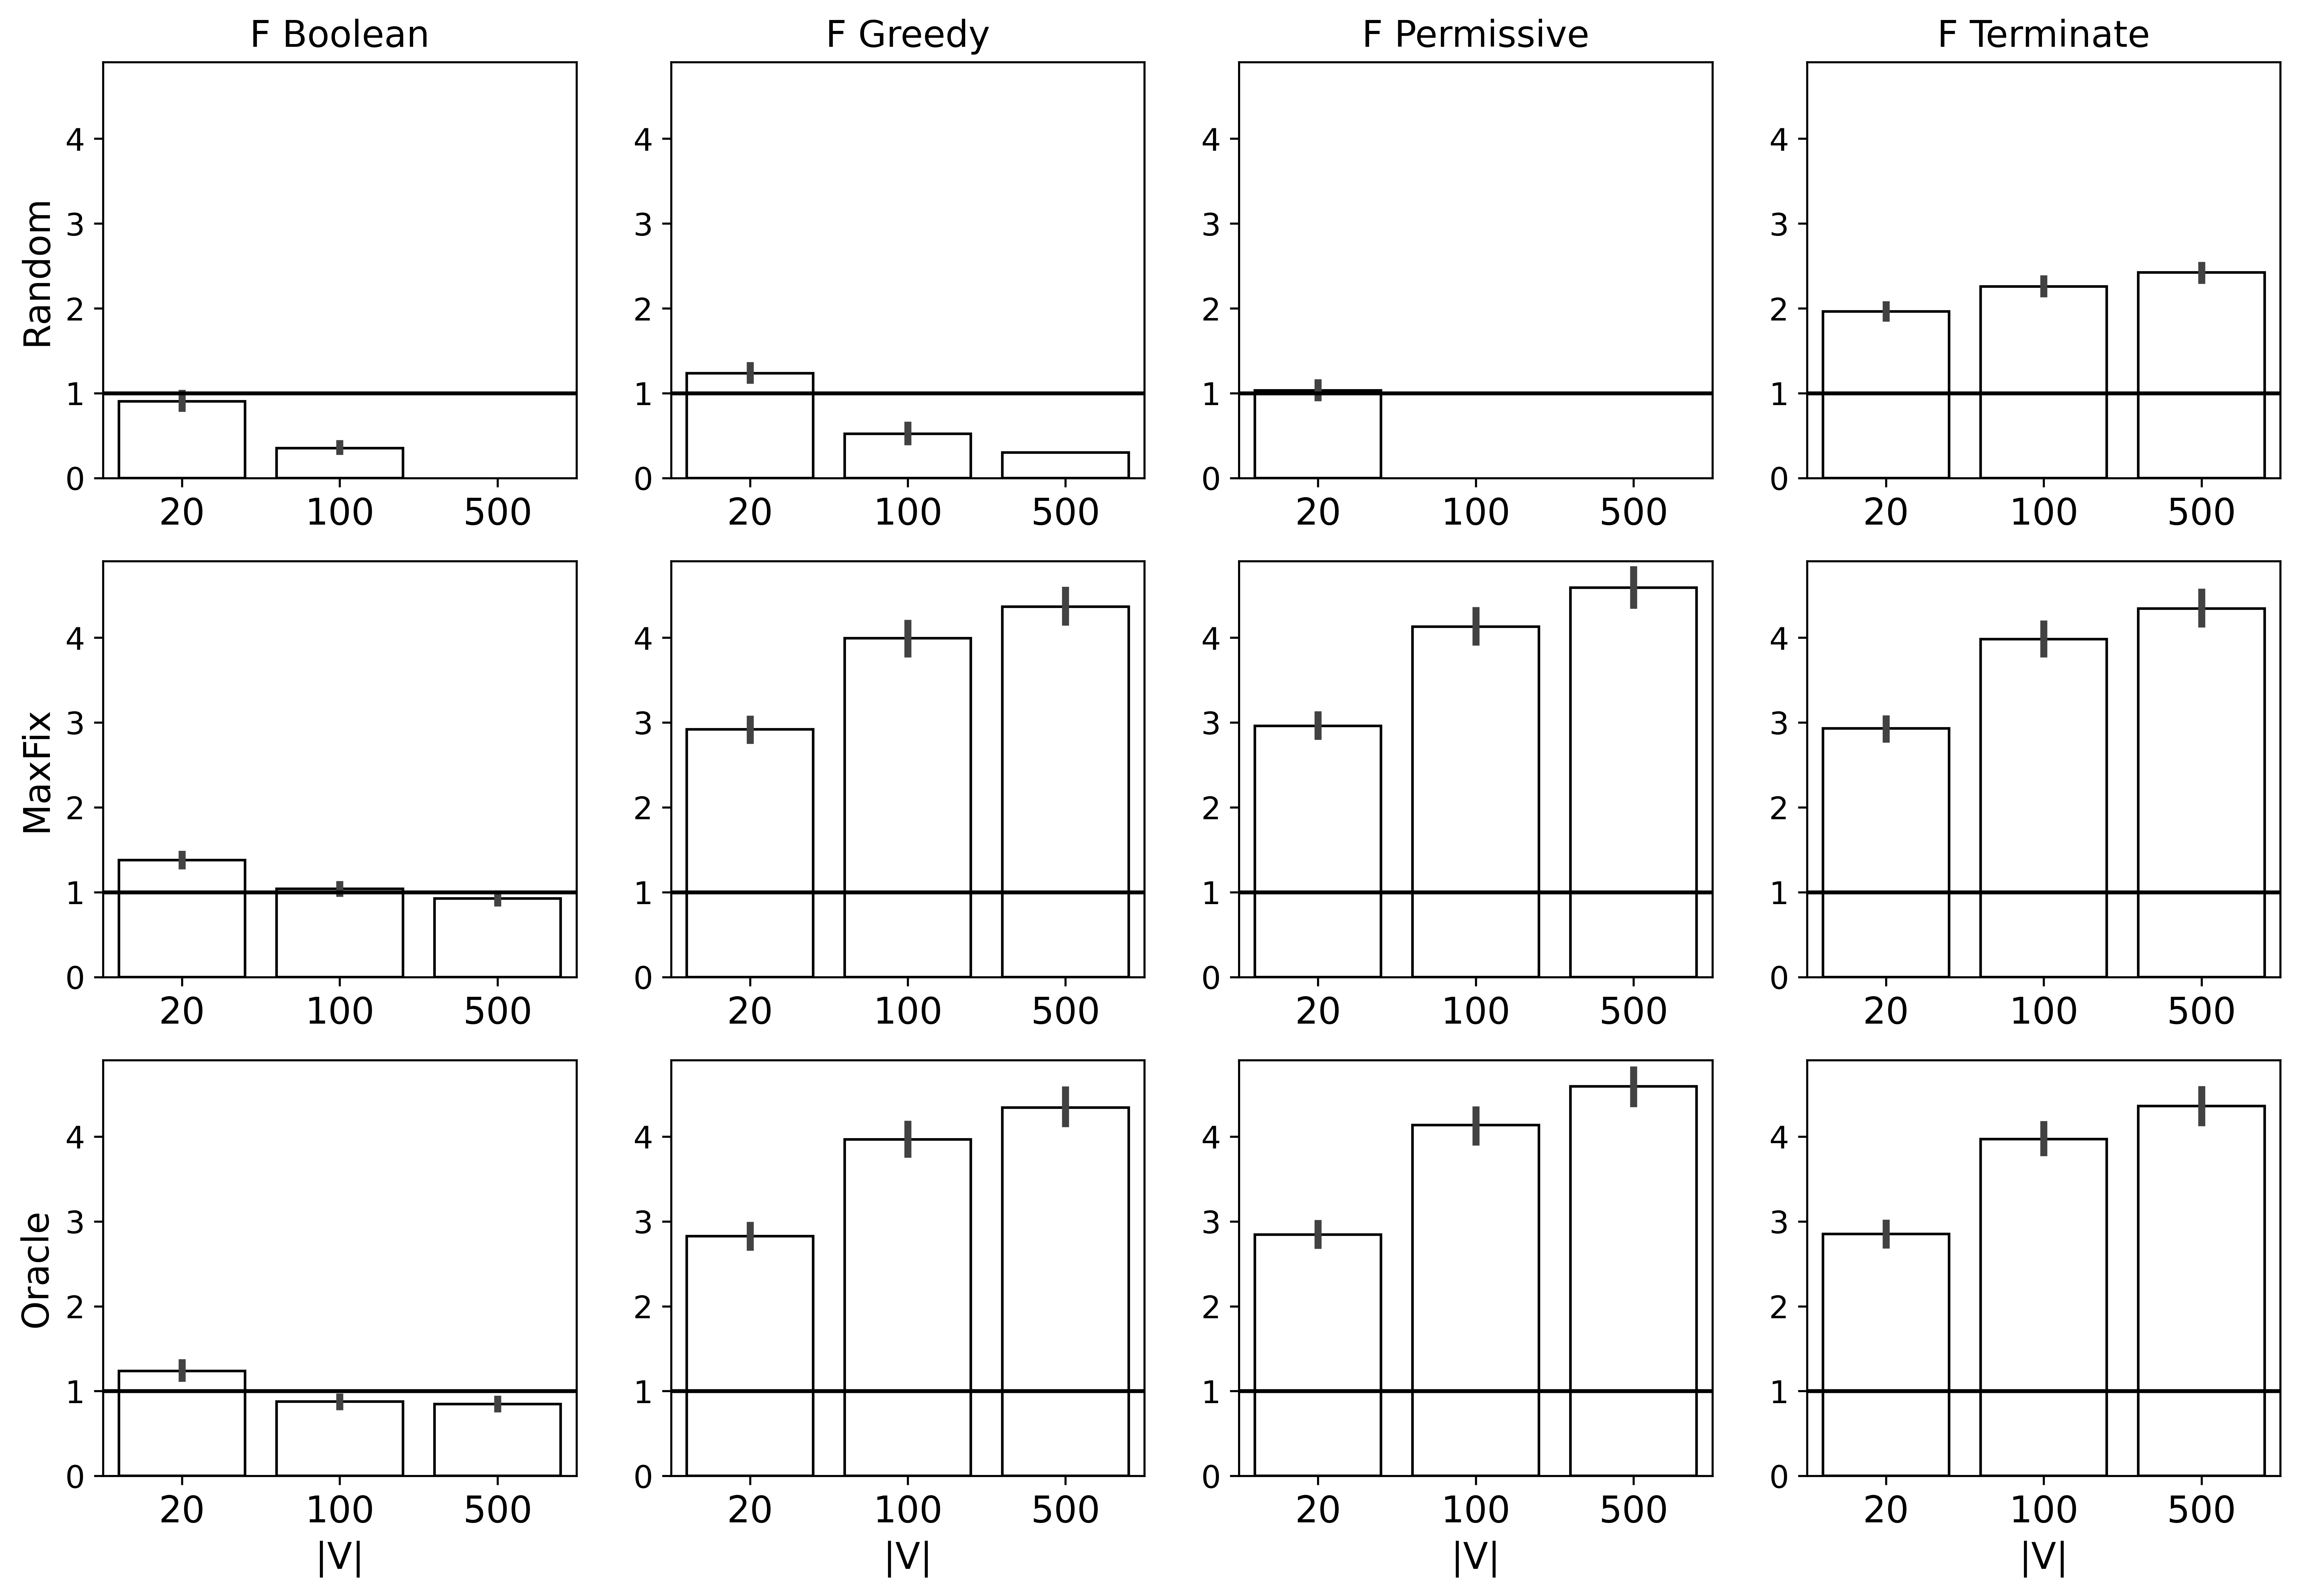

In [26]:
fig, axs = plt.subplots(3,4, figsize = (15, 10), sharex="row", dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(df["framework"].unique()):
    df_temp = df_11.query("user == '" + user + "' & framework == '" + framework + "'")

    sns.barplot(data=df_temp,
                x="V", y="resolution_ratio",
                orient = "v",
                ax=axs[i,j],
                edgecolor="black", color="white",
               )
    axs[i,j].set_ylim([0, 4.9])
    axs[i,j].set(xlabel=None, ylabel=None)
    axs[i,j].axhline(1, color="black")
    
for j,framework in enumerate(df["framework"].unique()):
    axs[0, j].set(title=framework_map[framework])
    axs[2, j].set(xlabel="|V|")
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

## Datasets

In [27]:
df_12 = df.query("noise == '(0.27, 0.33)'").copy()

In [28]:
# aggregate by (user, framework, dataset) triple
# report for (user, framework)
df_12.groupby(["user", "framework", "dataset"])["f1"].mean()\
     .reset_index()\
     .groupby(["user", "framework"])["f1"].describe()

count      mean       std       min       25%       50%  \
user       framework                                                            
userGreedy bool         4.0  0.402387  0.335308  0.126625  0.166020  0.311286   
           gree         4.0  0.598298  0.223592  0.390543  0.465627  0.547915   
           perm         4.0  0.586848  0.252387  0.307337  0.465551  0.562373   
           term         4.0  0.595426  0.224074  0.384777  0.463561  0.546609   
userOracle bool         4.0  0.659171  0.222905  0.503681  0.514913  0.575359   
           gree         4.0  0.975624  0.010837  0.960316  0.971847  0.978988   
           perm         4.0  0.994727  0.006090  0.989302  0.989530  0.994803   
           term         4.0  0.937055  0.034839  0.896723  0.914025  0.940127   
userRandom bool         4.0  0.287757  0.323241  0.083966  0.094421  0.150529   
           gree         4.0  0.247865  0.238745  0.084487  0.104255  0.154198   
           perm         2.0  0.124331  0.097366  0.055483  0.089907  0.124331   
           term         4.0  0.595426  0.224074  0.384777  0.463561  0.546609   

                           75%       max  
user       framework                      
userGreedy bool       0.547654  0.860352  
           gree       0.680586  0.906817  
           perm       0.683671  0.915309  
           term       0.678475  0.903710  
userOracle bool       0.719617  0.982286  
           gree       0.982765  0.984202  
           perm       1.000000  1.000000  
           term       0.963156  0.971244  
userRandom bool       0.343865  0.766005  
           gree       0.297808  0.598578  
           perm       0.158755  0.193179  
           term       0.678475  0.903710

### F1 per (framework, random, dataset)

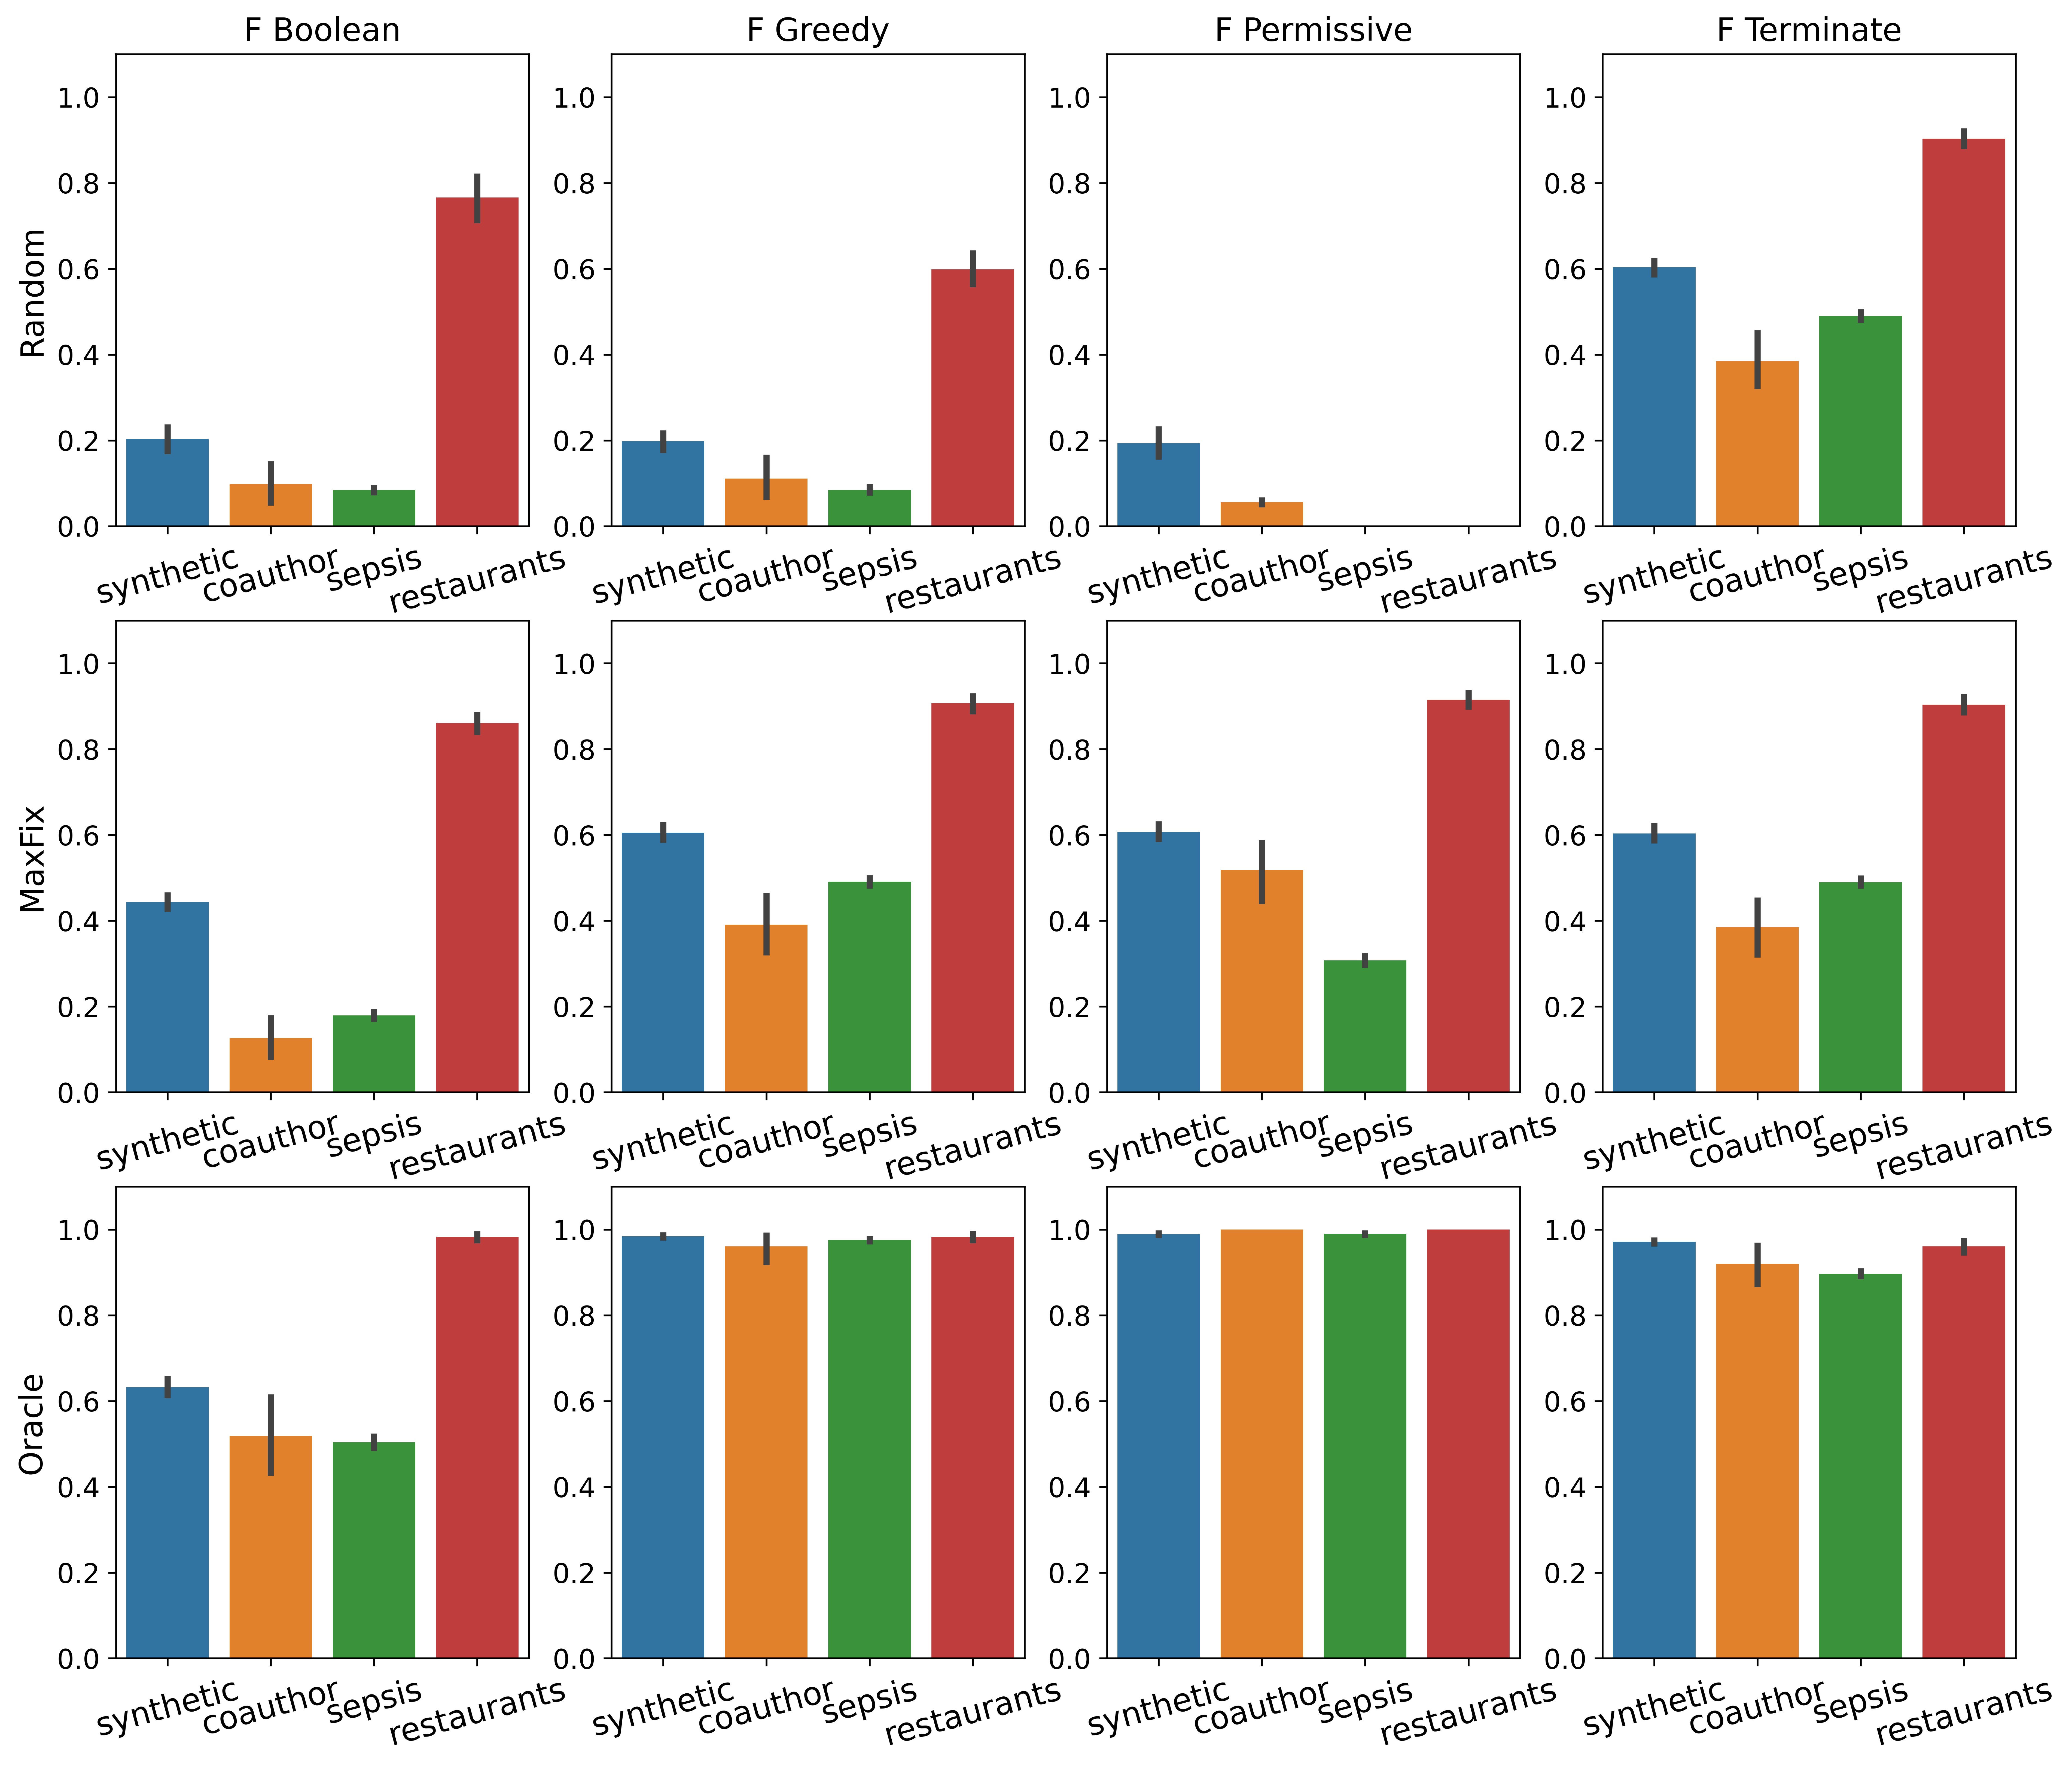

In [29]:
fig, axs = plt.subplots(3,4, figsize = (15, 13), sharex="row", dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(df_12["framework"].unique()):
    df_temp = df_12.query("user == '" + user + "' & framework == '" + framework + "'")    

    sns.barplot(data=df_temp,
                x="dataset", y="f1",
                orient = "v",
                ax=axs[i,j])
    
    axs[i,j].set_ylim([0, 1.1])
    axs[i, j].set(xlabel=None, ylabel=None)
    
for a in axs.flatten():
    #a.set(xlabel=None, ylabel=None)
    a.tick_params(axis='x', rotation=15)
    a.set_xticklabels([dataset_map[d.get_text()] for d in a.get_xticklabels()])
    
for j,framework in enumerate(df["framework"].unique()):
    axs[0, j].set(title=framework_map[framework])
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

### RR per (framework, random, dataset)

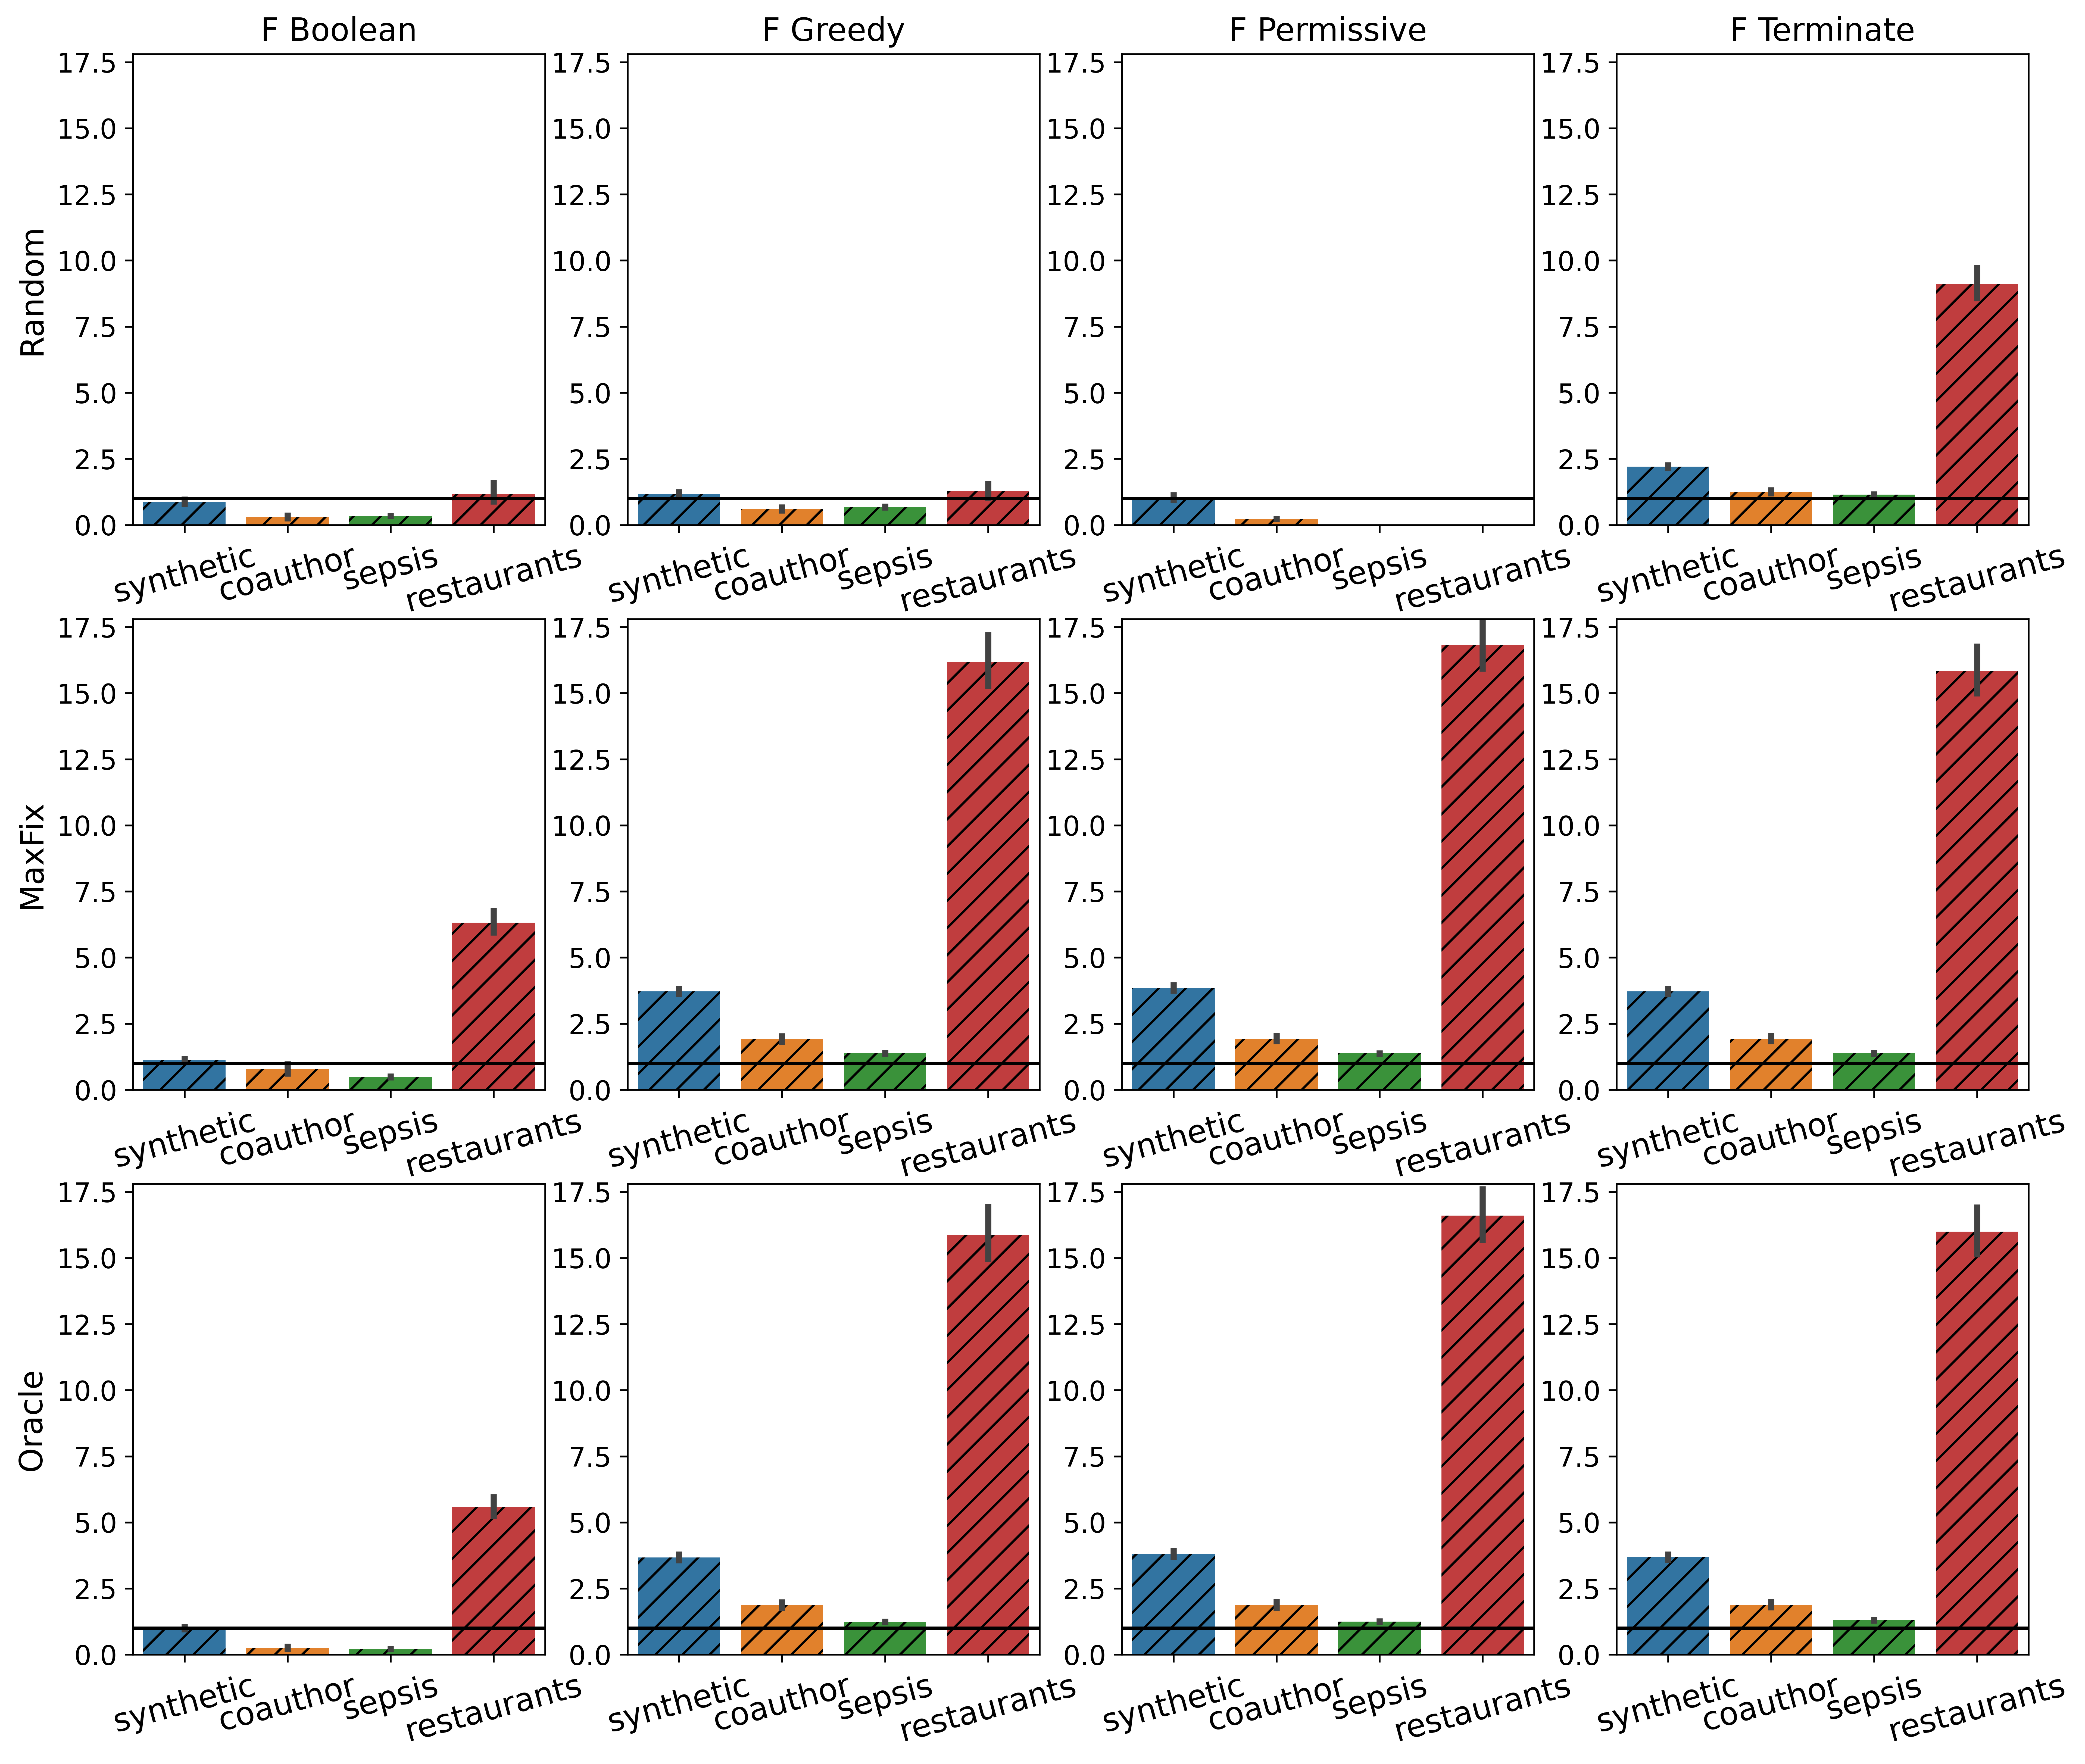

In [30]:
fig, axs = plt.subplots(3,4, figsize = (15, 13), sharex='row', dpi=600)

for i,user in enumerate(df["user"].unique()):
  for j,framework in enumerate(df_12["framework"].unique()):
    df_temp = df_12.query("user == '" + user + "' & framework == '" + framework + "'")    

    sns.barplot(data=df_temp,
                x="dataset", y="resolution_ratio",
                orient = "v",
                ax=axs[i,j],
                hatch = "//"
               )
    
    axs[i,j].set_ylim([0, 17.8])
    axs[i, j].set(xlabel=None, ylabel=None)
    axs[i,j].axhline(1, color="black")


    
for a in axs.flatten():
    #a.set(xlabel=None, ylabel=None)
    a.tick_params(axis='x', rotation=15)
    a.set_xticklabels([dataset_map[d.get_text()] for d in a.get_xticklabels()])
    
for j,framework in enumerate(df["framework"].unique()):
    axs[0, j].set(title=framework_map[framework])
    
for i,user in enumerate(df["user"].unique()):
    axs[i, 0].set(ylabel=user_map[user])

## Question difficulty

Text(0, 0.5, 'mean question difficulty')

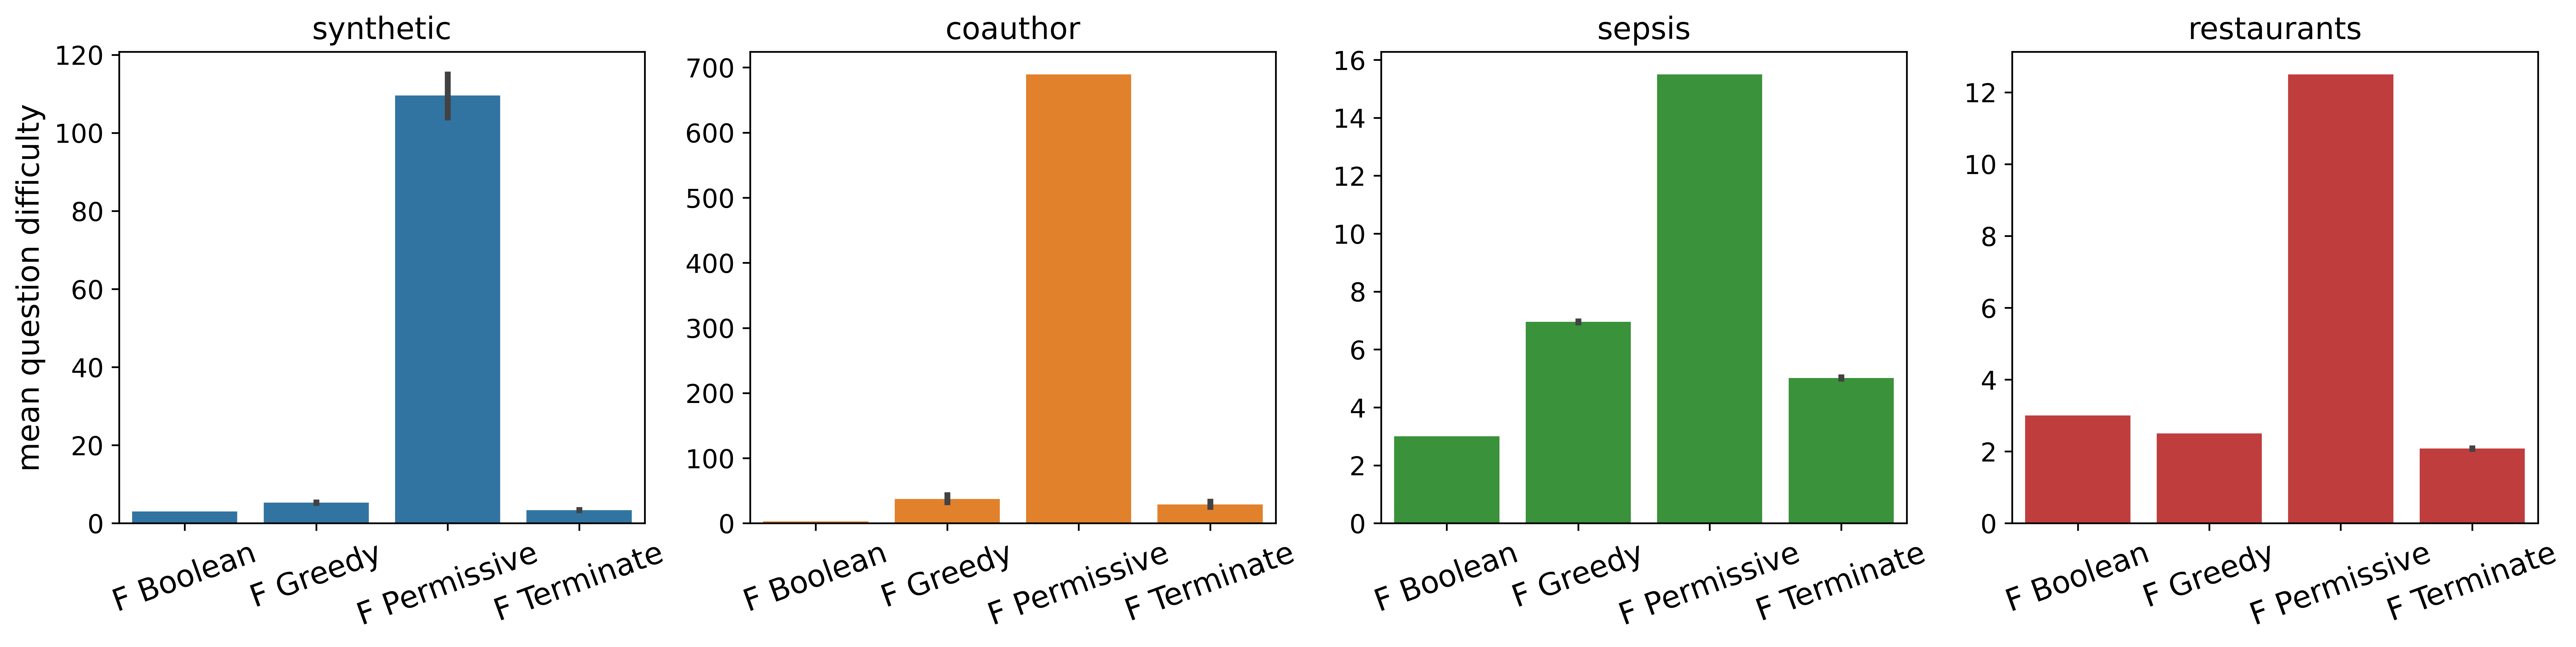

In [31]:
f, axs = plt.subplots(1,4,figsize = (20, 4), dpi=600)

for i,f in enumerate(df_12["dataset"].unique()):
    
    sns.barplot(data=df_12.query("dataset == '" + f + "'"),
                    x="framework", y="mqd", 
                    order=["bool", "gree", "perm", "term"], 
                    color=sns.color_palette("tab10")[i],
                    ax=axs[i])
    
    axs[i].set_title(dataset_map[f])
    axs[i].set(xlabel=None, ylabel=None)
    axs[i].set_xticklabels([framework_map[d.get_text()] for d in axs[i].get_xticklabels()])
    axs[i].tick_params(axis='x', rotation=20)



axs[0].set_ylabel("mean question difficulty")

Text(0, 0.5, 'question difficulty')

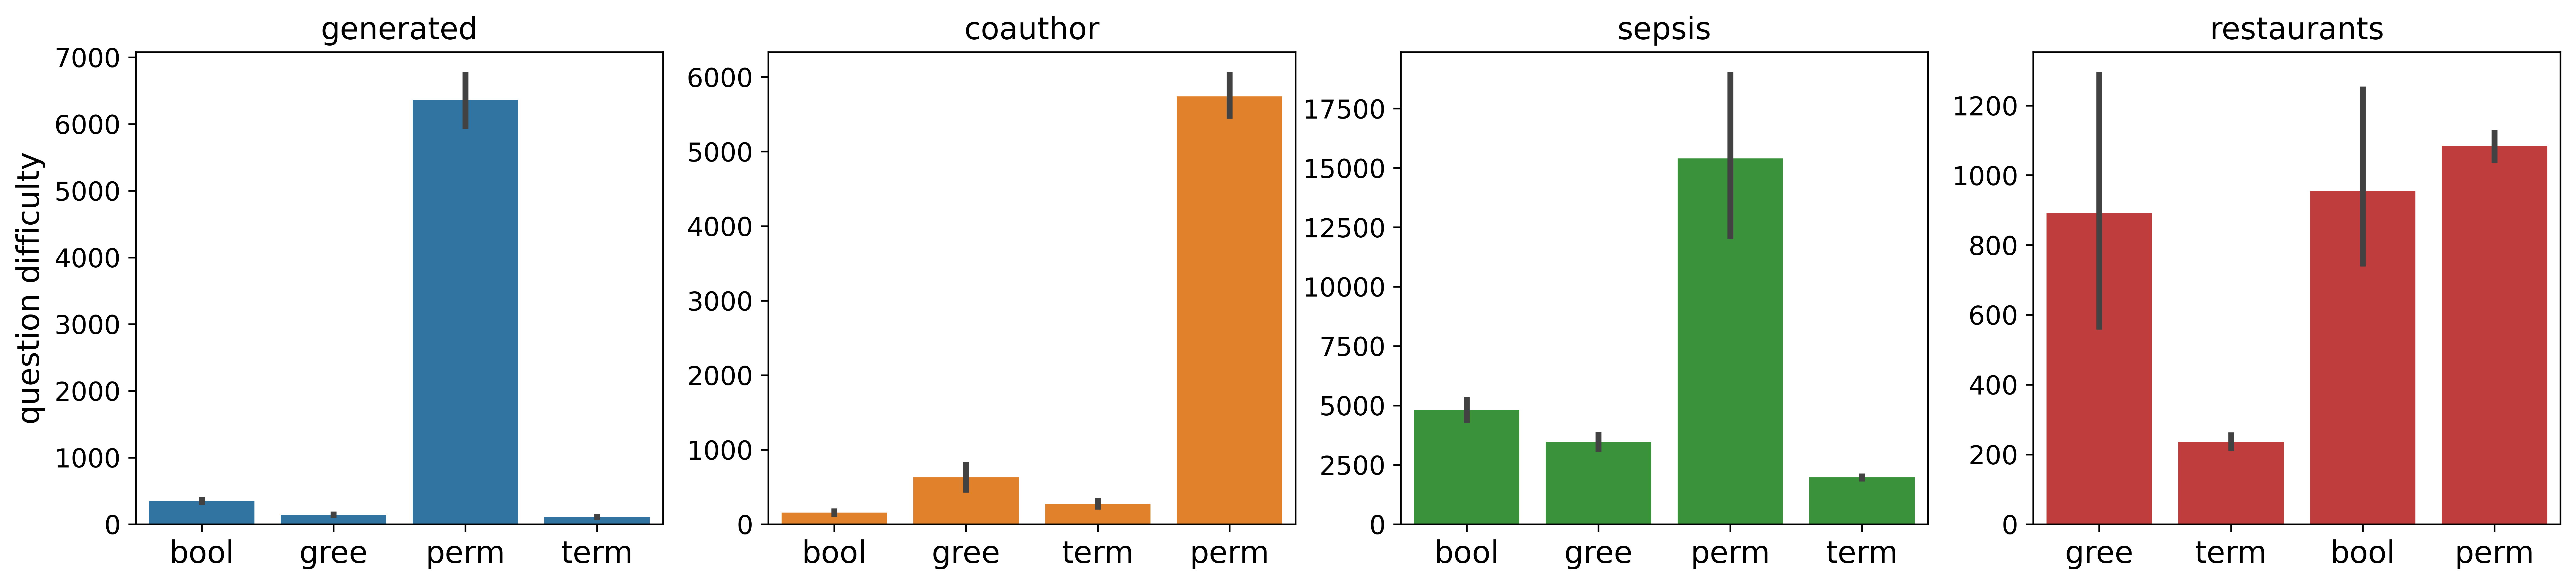

In [32]:
f, axs = plt.subplots(1,4,figsize = (20, 4), dpi=600)

for i,d in enumerate(df_12["dataset"].unique()):
    
    sns.barplot(data=df_12.query("dataset == '" + d + "'"),
                    x="framework", y="qd", color=sns.color_palette("tab10")[i],
                    ax=axs[i])
    
    axs[i].set_title(d)
    axs[i].set(xlabel=None, ylabel=None)

axs[0].set_ylabel("question difficulty")

# Bottom